In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv('MALARIA.csv')  # Replace with the actual file path

# Feature selection - Select relevant features for the regression model
# For this example, let's consider 'HUMIDITY', 'MAX TEMP', 'AVG TEMP', 'MIN TEMP', and 'PRECIPITATION'
selected_features = ['HUMIDITY', 'MAX TEMP', 'AVG TEMP', 'MIN TEMP', 'PRECIPITATION']

# Prepare the features (X) and target (y)
X = data[selected_features]
y = data['MALE'] + data['FEMALE']  # Total number of dengue cases (sum of male and female cases)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)

    # Print the R-squared score for each model
    print(f'R-squared for {model_name}: {r2}')

# Optionally, you can use the models to make predictions for new data
# For example, to predict the number of dengue cases for a specific location and week
new_data = pd.DataFrame({
    'HUMIDITY': [80],
    'MAX TEMP': [90],
    'AVG TEMP': [85],
    'MIN TEMP': [75],
    'PRECIPITATION': [2.5]
})

# Predict using the trained models
for model_name, model in models.items():
    predicted_cases = model.predict(new_data)
    print(f'Predicted dengue cases using {model_name}: {predicted_cases}')


R-squared for Linear Regression: 0.1327050650296796
R-squared for Random Forest Regressor: 0.2500790771656147
R-squared for Gradient Boosting Regressor: 0.26916630213347115
Predicted dengue cases using Linear Regression: [5.67128358]
Predicted dengue cases using Random Forest Regressor: [4.7630119]
Predicted dengue cases using Gradient Boosting Regressor: [3.78116089]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Load the dataset
data = pd.read_csv('MALARIA.csv')  # Replace with the actual file path

# Select relevant features for the RNN model, including 'MONTH' and 'WEEK'
selected_features = ['MONTH', 'WEEK', 'HUMIDITY', 'MAX TEMP', 'AVG TEMP', 'MIN TEMP', 'PRECIPITATION']

# Prepare the features (X) and target (y)
X = data[selected_features]
y = data['MALE'] + data['FEMALE']  # Total number of malaria cases (sum of male and female cases)

# One-hot encode 'MONTH'
X = pd.get_dummies(X, columns=['MONTH'], prefix='MONTH')

# Standardize the features (excluding 'WEEK')
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[['HUMIDITY', 'MAX TEMP', 'AVG TEMP', 'MIN TEMP', 'PRECIPITATION']] = scaler.fit_transform(X_scaled[['HUMIDITY', 'MAX TEMP', 'AVG TEMP', 'MIN TEMP', 'PRECIPITATION']])

# Standardize 'WEEK'
X_scaled['WEEK'] = X_scaled['WEEK'] / X_scaled['WEEK'].max()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Reshape the features for RNN input
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(128, activation='relu', input_shape=(1, X_train.shape[2])))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(Dense(1))

# Compile the model
model.compile(optimizer='rmsprop', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=64, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


# Create a DataFrame to hold predictions and actuals
predictions_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred.reshape(-1)})

# Display the DataFrame with predictions and actuals
print('Predictions vs Actuals:')
print(predictions_df.head())



Epoch 1/1000
6/6 [==============================] - 1s 4ms/step - loss: 25.0700
Epoch 2/1000
6/6 [==============================] - 0s 4ms/step - loss: 22.1575
Epoch 3/1000
6/6 [==============================] - 0s 4ms/step - loss: 20.1815
Epoch 4/1000
6/6 [==============================] - 0s 4ms/step - loss: 18.6009
Epoch 5/1000
6/6 [==============================] - 0s 4ms/step - loss: 17.2753
Epoch 6/1000
6/6 [==============================] - 0s 4ms/step - loss: 15.9645
Epoch 7/1000
6/6 [==============================] - 0s 4ms/step - loss: 14.7963
Epoch 8/1000
6/6 [==============================] - 0s 4ms/step - loss: 14.0254
Epoch 9/1000
6/6 [==============================] - 0s 4ms/step - loss: 13.2628
Epoch 10/1000
6/6 [==============================] - 0s 4ms/step - loss: 12.2722
Epoch 11/1000
6/6 [==============================] - 0s 5ms/step - loss: 11.5863
Epoch 12/1000
6/6 [==============================] - 0s 4ms/step - loss: 10.9776
Epoch 13/1000
6/6 [==================

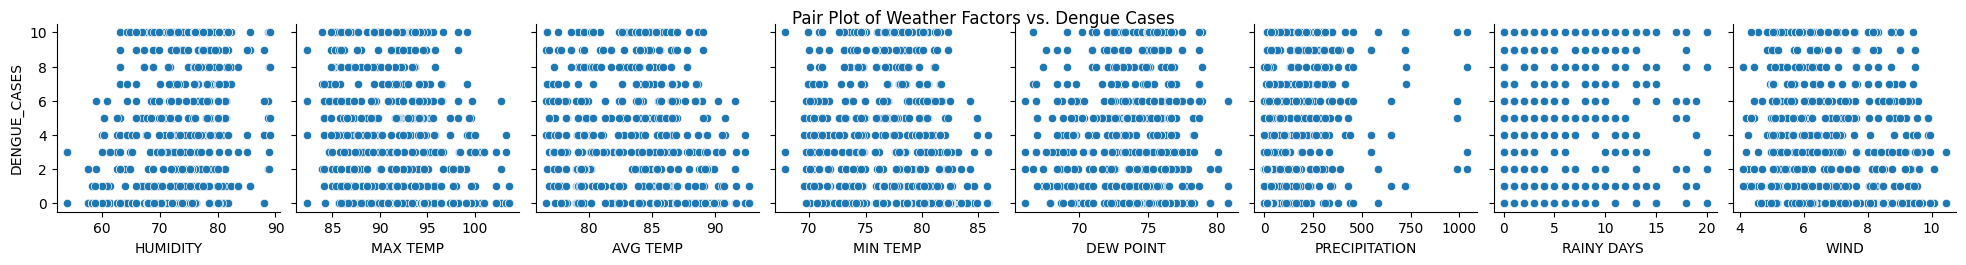

<ipython-input-9-e12e64ef429d>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = weather_data.corr()


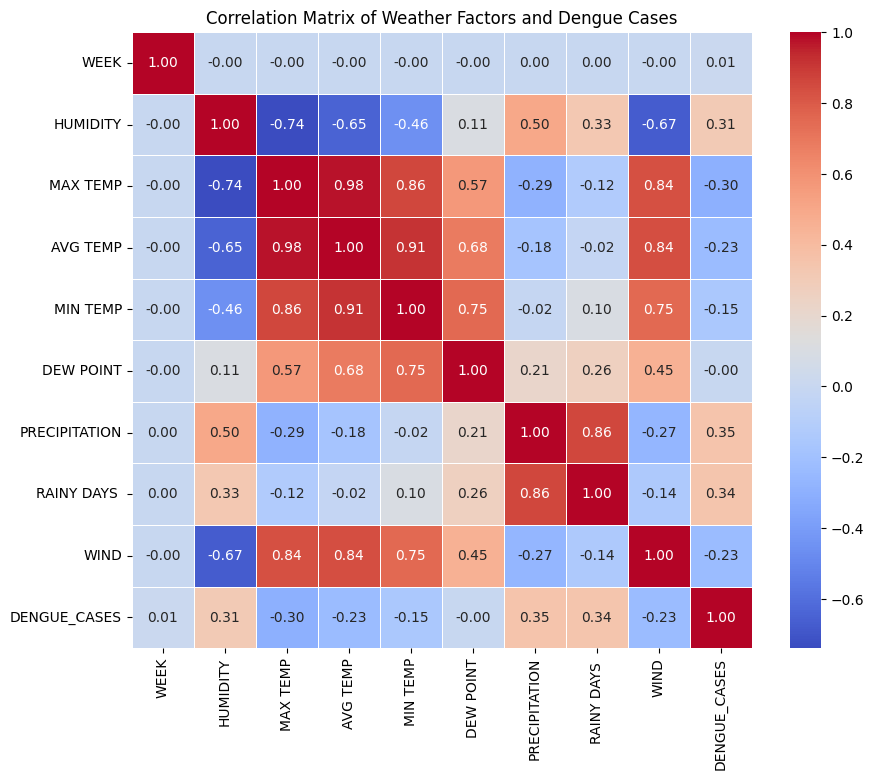

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('MALARIA.csv')  # Update with the actual file path
# Remove rows with missing values
data.dropna(inplace=True)

# Calculate total dengue cases
data['DENGUE_CASES'] = data['MALE'] + data['FEMALE']

# Select relevant weather-related features
weather_features = ['HUMIDITY', 'MAX TEMP', 'AVG TEMP', 'MIN TEMP', 'DEW POINT', 'PRECIPITATION', 'RAINY DAYS ', 'WIND']

# Select features for weather analysis
weather_data = data[['MONTH', 'WEEK'] + weather_features + ['DENGUE_CASES']]

# Pair plot to visualize relationships between weather factors and dengue cases
sns.pairplot(weather_data, x_vars=weather_features, y_vars='DENGUE_CASES', kind='scatter')
plt.suptitle('Pair Plot of Weather Factors vs. Dengue Cases', y=1.02)
plt.show()

# Correlation heatmap
correlation_matrix = weather_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Weather Factors and Dengue Cases')
plt.show()








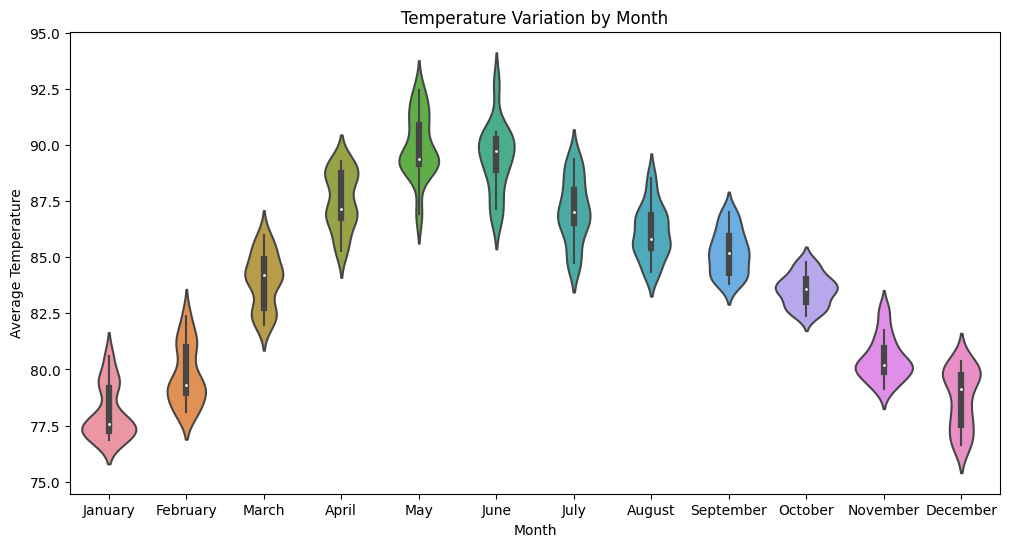

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing values in the selected features and target
selected_features = ['MONTH', 'WEEK', 'HUMIDITY', 'MAX TEMP', 'AVG TEMP', 'MIN TEMP', 'PRECIPITATION', 'RAINY DAYS ','WIND']
data_selected = data[selected_features + ['MALE', 'FEMALE']].dropna()

# Calculate total dengue cases
data_selected['TOTAL_DENGUE_CASES'] = data_selected['MALE'] + data_selected['FEMALE']


# Violin plot for temperature and dengue cases
plt.figure(figsize=(12, 6))
sns.violinplot(x='MONTH', y='AVG TEMP', data=data_selected)
plt.title('Temperature Variation by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.show()




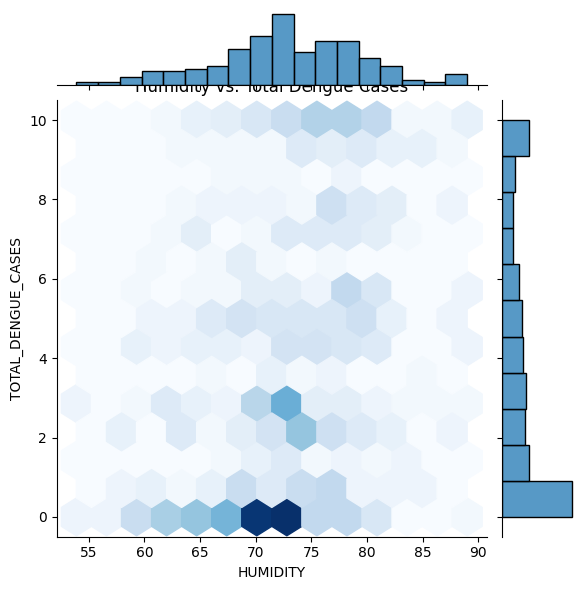

In [ ]:
# Joint plot for humidity and dengue cases
sns.jointplot(x='HUMIDITY', y='TOTAL_DENGUE_CASES', data=data_selected, kind='hex', cmap='Blues')
plt.title('Humidity vs. Total Dengue Cases')
plt.show()

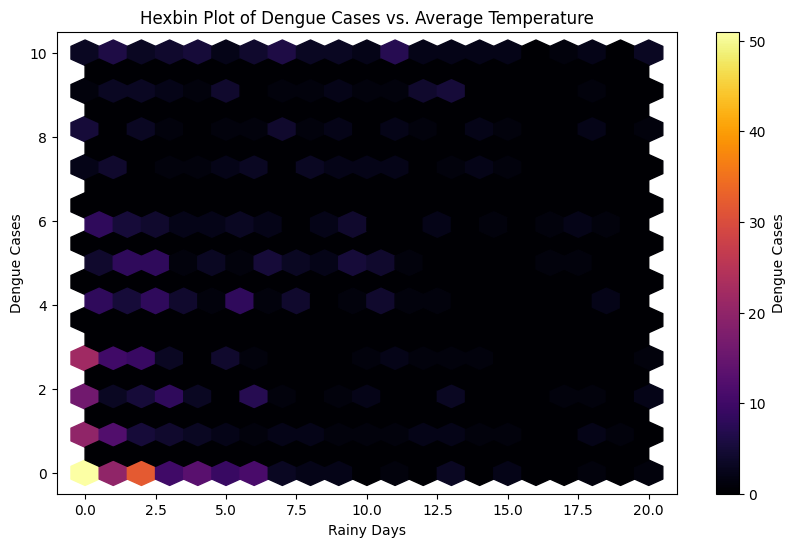

In [ ]:
# Hexbin plot for temperature and dengue cases
plt.figure(figsize=(10, 6))
hb = plt.hexbin(data_selected['RAINY DAYS '], data_selected['MALE'] + data_selected['FEMALE'], gridsize=20, cmap='inferno')
plt.colorbar(hb, label='Dengue Cases')
plt.xlabel('Rainy Days')
plt.ylabel('Dengue Cases')
plt.title('Hexbin Plot of Dengue Cases vs. Average Temperature')
plt.show()


NameError: ignored

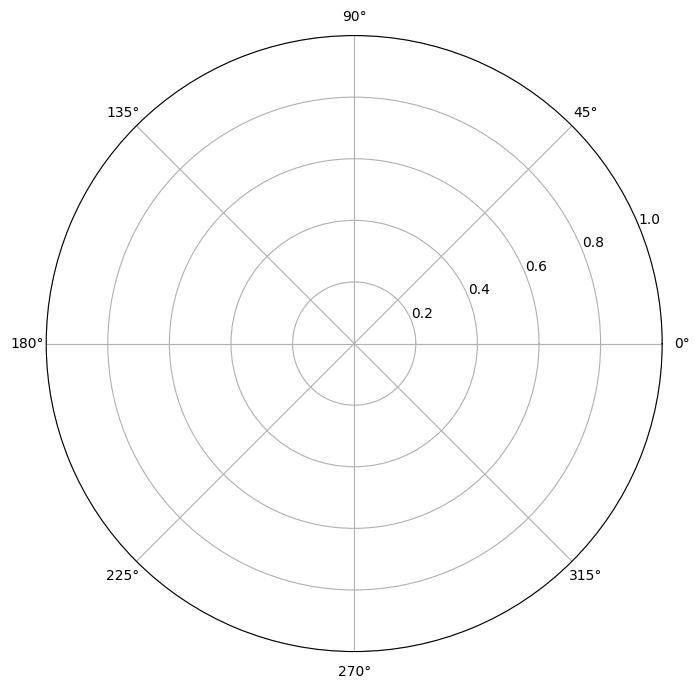

In [ ]:
# Radial plot for wind speed and dengue cases
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.plot(data_selected['WIND'] * np.pi / 180, data_selected['MALE'] + data_selected['FEMALE'], 'bo', alpha=0.5)
ax.set_rmax(data_selected['MALE'].max() + data_selected['FEMALE'].max())
ax.set_rticks([])
ax.set_yticklabels([])
plt.title('Radial Plot of Dengue Cases vs. Wind Speed')
plt.show()


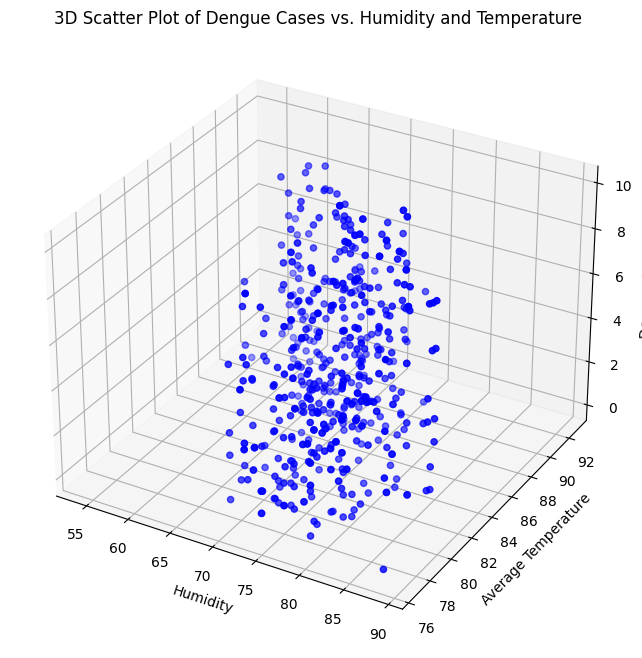

In [ ]:
# 3D Scatter plot for humidity, temperature, and dengue cases
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_selected['HUMIDITY'], data_selected['AVG TEMP'], data_selected['MALE'] + data_selected['FEMALE'], c='b', marker='o')
ax.set_xlabel('Humidity')
ax.set_ylabel('Average Temperature')
ax.set_zlabel('Dengue Cases')
ax.set_title('3D Scatter Plot of Dengue Cases vs. Humidity and Temperature')
plt.show()


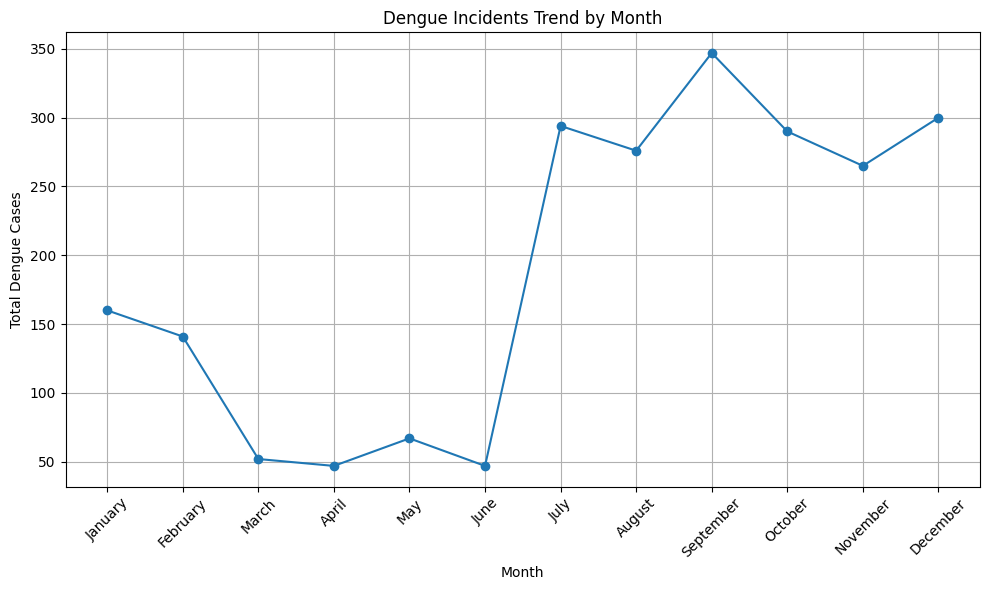

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Custom order for months
custom_month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Apply custom month order
data['MONTH'] = pd.Categorical(data['MONTH'], categories=custom_month_order, ordered=True)

# Group by month and calculate total dengue cases
monthly_dengue_cases = data.groupby('MONTH')[['MALE', 'FEMALE']].sum()
monthly_dengue_cases['TOTAL_CASES'] = monthly_dengue_cases['MALE'] + monthly_dengue_cases['FEMALE']

# Plotting the trend of dengue incidents over months
plt.figure(figsize=(10, 6))
plt.plot(monthly_dengue_cases.index, monthly_dengue_cases['TOTAL_CASES'], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Dengue Cases')
plt.title('Dengue Incidents Trend by Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


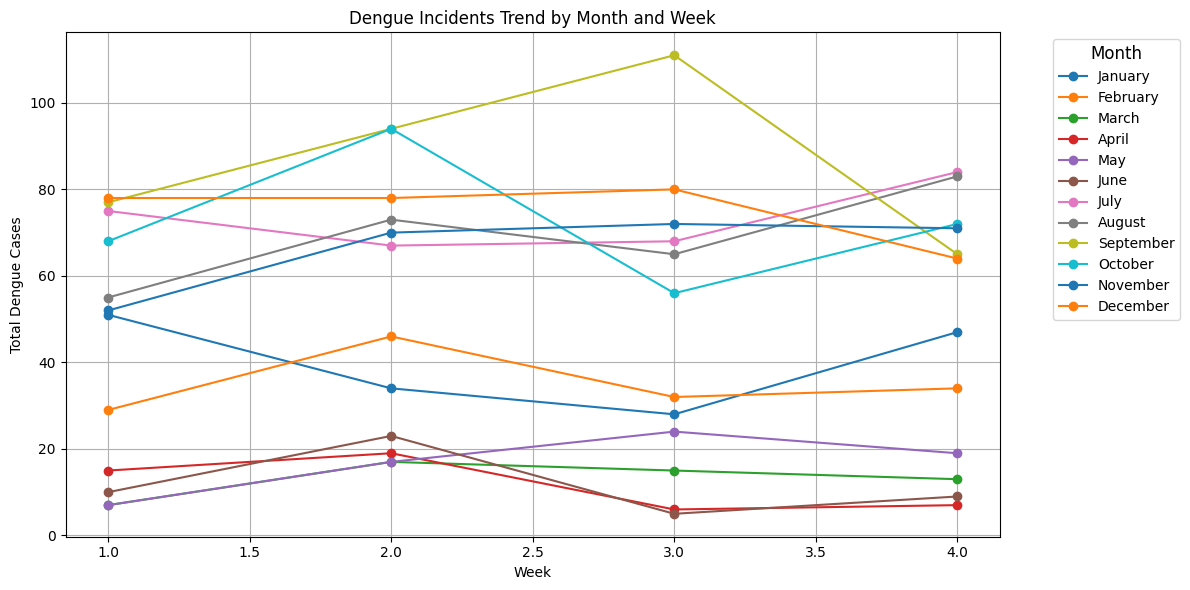

In [ ]:
import matplotlib.pyplot as plt

# Custom order for months
custom_month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Apply custom month order
data['MONTH'] = pd.Categorical(data['MONTH'], categories=custom_month_order, ordered=True)

# Group by month and week and calculate total dengue cases
monthly_weekly_dengue_cases = data.groupby(['MONTH', 'WEEK'])[['MALE', 'FEMALE']].sum()
monthly_weekly_dengue_cases['TOTAL_CASES'] = monthly_weekly_dengue_cases['MALE'] + monthly_weekly_dengue_cases['FEMALE']

# Reset index for plotting
monthly_weekly_dengue_cases = monthly_weekly_dengue_cases.reset_index()

# Plotting the trend of dengue incidents over months and weeks
plt.figure(figsize=(12, 6))
for month in custom_month_order:
    monthly_data = monthly_weekly_dengue_cases[monthly_weekly_dengue_cases['MONTH'] == month]
    plt.plot(monthly_data['WEEK'], monthly_data['TOTAL_CASES'], label=month, marker='o')

plt.xlabel('Week')
plt.ylabel('Total Dengue Cases')
plt.title('Dengue Incidents Trend by Month and Week')
plt.legend(title='Month', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-4-634192070ca2>:45: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


Accuracy: 0.5284552845528455
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.41      0.47        64
           1       0.51      0.66      0.57        59

    accuracy                           0.53       123
   macro avg       0.54      0.53      0.52       123
weighted avg       0.54      0.53      0.52       123



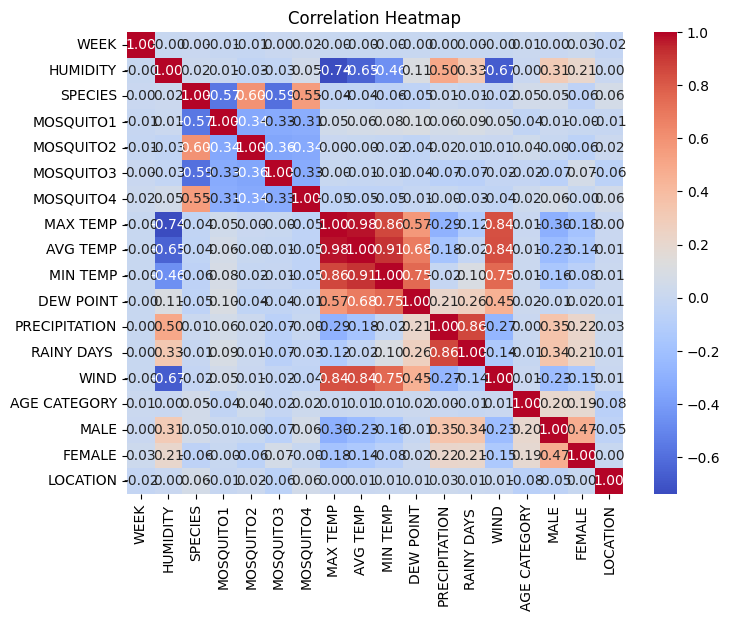

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('MALARIA.csv')  # Replace with the actual file path



# Encode categorical variables
label_encoder = LabelEncoder()
df['LOCATION'] = label_encoder.fit_transform(df['LOCATION'])
df['SPECIES'] = label_encoder.fit_transform(df['SPECIES'])

# Feature selection
selected_features = ['HUMIDITY', 'MAX TEMP', 'AVG TEMP', 'MIN TEMP', 'DEW POINT', 'PRECIPITATION', 'RAINY DAYS ',
                     'WIND', 'AGE CATEGORY', 'MALE', 'FEMALE','LOCATION']

# Prepare the features (X) and target (y)
X = df[selected_features]
y = df['SPECIES']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the mosquito type
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualization (you may need to adjust based on your dataset and requirements)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

# Load the dataset
df = pd.read_csv('MALARIA.csv')  # Replace with the actual file path


label_encoder = LabelEncoder()
df['LOCATION'] = label_encoder.fit_transform(df['LOCATION'])
df['SPECIES'] = label_encoder.fit_transform(df['SPECIES'])
X = df[selected_features]
y = df['SPECIES']

# Feature selection and encoding
selected_features = ['HUMIDITY', 'MAX TEMP', 'AVG TEMP', 'MIN TEMP', 'DEW POINT', 'PRECIPITATION', 'RAINY DAYS ',
                     'WIND', 'AGE CATEGORY', 'MALE', 'FEMALE','LOCATION']
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handling imbalanced data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_scaled, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# Hyperparameter tuning for Gradient Boosting
param_grid_gb = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10], 'learning_rate': [0.1, 0.01, 0.001]}
gb_classifier = GradientBoostingClassifier(random_state=42)
grid_search_gb = GridSearchCV(gb_classifier, param_grid_gb, cv=5, n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_

# Evaluate the models
y_pred_rf = best_rf_model.predict(X_test)
y_pred_gb = best_gb_model.predict(X_test)

print('Random Forest Model:')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))

print('Gradient Boosting Model:')
print('Accuracy:', accuracy_score(y_test, y_pred_gb))
print('Classification Report:')
print(classification_report(y_test, y_pred_gb))


Random Forest Model:
Accuracy: 0.5564516129032258
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.54      0.55        63
           1       0.55      0.57      0.56        61

    accuracy                           0.56       124
   macro avg       0.56      0.56      0.56       124
weighted avg       0.56      0.56      0.56       124

Gradient Boosting Model:
Accuracy: 0.5806451612903226
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.67      0.62        63
           1       0.59      0.49      0.54        61

    accuracy                           0.58       124
   macro avg       0.58      0.58      0.58       124
weighted avg       0.58      0.58      0.58       124



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
import xgboost as xgb
import lightgbm as lgb

# Load the dataset
df = pd.read_csv('MALARIA.csv')  # Replace with the actual file path


label_encoder = LabelEncoder()
df['LOCATION'] = label_encoder.fit_transform(df['LOCATION'])
df['SPECIES'] = label_encoder.fit_transform(df['SPECIES'])
X = df[selected_features]
y = df['SPECIES']

# Feature selection and encoding
selected_features = ['HUMIDITY', 'MAX TEMP', 'AVG TEMP', 'MIN TEMP', 'DEW POINT', 'PRECIPITATION', 'RAINY DAYS ',
                     'WIND', 'AGE CATEGORY', 'MALE', 'FEMALE','LOCATION']
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handling imbalanced data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_scaled, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# Hyperparameter tuning for Gradient Boosting
param_grid_gb = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10], 'learning_rate': [0.1, 0.01, 0.001]}
gb_classifier = GradientBoostingClassifier(random_state=42)
grid_search_gb = GridSearchCV(gb_classifier, param_grid_gb, cv=5, n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_

# Using XGBoost and LightGBM
xgb_classifier = xgb.XGBClassifier(random_state=42)
lgb_classifier = lgb.LGBMClassifier(random_state=42)

# Fit the XGBoost model
xgb_classifier.fit(X_train, y_train)

# Fit the LightGBM model
lgb_classifier.fit(X_train, y_train)


# Ensemble Learning (Voting Classifier)
voting_classifier = VotingClassifier(estimators=[
    ('RandomForest', best_rf_model),
    ('GradientBoosting', best_gb_model),
    ('XGBoost', xgb_classifier),
    ('LightGBM', lgb_classifier)
], voting='soft')

# Fit the ensemble model
voting_classifier.fit(X_train, y_train)

# Evaluate the models
models = [best_rf_model, best_gb_model, xgb_classifier, lgb_classifier, voting_classifier]
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'Voting Classifier']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    print(f'{name} Model:')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('\n')


[LightGBM] [Info] Number of positive: 248, number of negative: 246
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 494, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502024 -> initscore=0.008097
[LightGBM] [Info] Start training from score 0.008097
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

Feature Engineering and Non-linear Models.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('MALARIA.csv')  # Replace with the actual file path


# Feature Engineering (Example: Adding a new feature based on existing features)
df['NEW_FEATURE'] = df['MAX TEMP'] - df['MIN TEMP']

label_encoder = LabelEncoder()
df['LOCATION'] = label_encoder.fit_transform(df['LOCATION'])
df['SPECIES'] = label_encoder.fit_transform(df['SPECIES'])

# Feature selection and encoding
selected_features = ['HUMIDITY', 'MAX TEMP', 'AVG TEMP', 'MIN TEMP', 'DEW POINT', 'PRECIPITATION', 'RAINY DAYS ',
                     'WIND', 'AGE CATEGORY', 'MALE', 'FEMALE','LOCATION', 'NEW_FEATURE']
X = df[selected_features]
y = df['SPECIES']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Non-linear Models: SVM and k-NN
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()

# Fit the models
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_classifier.predict(X_test)
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the models
print('SVM Model:')
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Classification Report:')
print(classification_report(y_test, y_pred_svm))
print('\n')

print('k-NN Model:')
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Classification Report:')
print(classification_report(y_test, y_pred_knn))
print('\n')


SVM Model:
Accuracy: 0.5806451612903226
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.50      0.54        30
           1       0.58      0.66      0.62        32

    accuracy                           0.58        62
   macro avg       0.58      0.58      0.58        62
weighted avg       0.58      0.58      0.58        62



k-NN Model:
Accuracy: 0.5967741935483871
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.63      0.60        30
           1       0.62      0.56      0.59        32

    accuracy                           0.60        62
   macro avg       0.60      0.60      0.60        62
weighted avg       0.60      0.60      0.60        62





the Ensemble Methods strategy (AdaBoost and Bagging)

In [ ]:


# Ensemble Methods: AdaBoost and Bagging
adaboost_classifier = AdaBoostClassifier(base_estimator=svm_classifier, n_estimators=50, algorithm='SAMME', random_state=42)
bagging_classifier = BaggingClassifier(base_estimator=knn_classifier, n_estimators=50, random_state=42)

# Fit the models
adaboost_classifier.fit(X_train, y_train)
bagging_classifier.fit(X_train, y_train)

# Predictions
y_pred_adaboost = adaboost_classifier.predict(X_test)
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate the models
print('AdaBoost Model:')
print('Accuracy:', accuracy_score(y_test, y_pred_adaboost))
print('Classification Report:')
print(classification_report(y_test, y_pred_adaboost))
print('\n')

print('Bagging Model:')
print('Accuracy:', accuracy_score(y_test, y_pred_bagging))
print('Classification Report:')
print(classification_report(y_test, y_pred_bagging))
print('\n')



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Model:
Accuracy: 0.5161290322580645
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.52      1.00      0.68        32

    accuracy                           0.52        62
   macro avg       0.26      0.50      0.34        62
weighted avg       0.27      0.52      0.35        62



Bagging Model:
Accuracy: 0.6451612903225806
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.70      0.66        30
           1       0.68      0.59      0.63        32

    accuracy                           0.65        62
   macro avg       0.65      0.65      0.64        62
weighted avg       0.65      0.65      0.64        62





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
